#<div align="center">LAB 9 Gale-Shapley and Irving Algorithms</div>
David Alexander Núñez Quintero
<br>
<br>
<hr>

### 1) Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [ ]:
import math
import pandas as pd
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import random
import matplotlib.pyplot as plt


In [ ]:
def Gale_Shapley(pr_man,pr_women,n):

    man_list = list(range(1,n+1))
    women_list = list(range(n+1,n*2+1))
    col=list(range(n+1,n*2+1))

    ind=list(range(1,n+1))

    women_df = pd.DataFrame({col[i]:pr_women[i] for i in range(n)},index=ind)
 
    man_df = pd.DataFrame(pr_man,columns=col,index=ind)

    # dict to control which women each man can make proposals
    women_available = {man:women_list for man in man_list}
    # waiting list of men that were able to create pair on each iteration
    waiting_list = []
    # dict to store created pairs
    proposals = {}
    # variable to count number of iterations
    count = 0
    while len(waiting_list)<len(man_list):
        # man makes proposals
        for man in man_list:
    
            if man not in waiting_list:
                # each man make proposal to the top women from it's list
                women = women_available[man]
                best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
                
                proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                    women_df.loc[man][best_choice])
        # if women have more than one proposals 
        # she will choose the best option
        overlays = Counter([key[1] for key in proposals.keys()])
        
        # cycle to choose the best options
        for women in overlays.keys():
            if overlays[women]>1:
                # pairs to drop from proposals
                pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key=lambda x: x[1][1])[1:]
                # if man was rejected by woman
                # there is no pint for him to make proposal 
                # second time to the same woman
                for p_to_drop in pairs_to_drop:
                    del proposals[p_to_drop[0]]
                    _women = copy(women_available[p_to_drop[0][0]])
                    _women.remove(p_to_drop[0][1])
                    women_available[p_to_drop[0][0]] = _women
        # man who successfully created pairs must be added to the waiting list 
        waiting_list = [man[0] for man in proposals.keys()]
        # update counter
        count+=1


    print(proposals)
    print("days=",count)

##Worst case
### - n=4:  10 days


In [ ]:
mans=[[1,2,3,4],[3,1,2,4],[2,3,1,4],[1,2,3,4]]
womans=[[4,1,2,3],[3,4,1,2],[2,3,4,1],[1,2,3,4]]
Gale_Shapley(mans,womans,4)

{(2, 5): (3, 1), (3, 6): (3, 1), (4, 7): (3, 1), (1, 8): (4, 1)}
days= 10


##Best case
### - n=4:  1 days


In [ ]:
mans=[[1,2,3,4],[3,1,2,4],[2,3,1,4],[4,2,3,1]]
womans=[[1,2,3,4],[3,1,2,4],[2,3,1,4],[4,2,3,1]]
Gale_Shapley(mans,womans,4)

{(1, 5): (1, 1), (2, 6): (1, 1), (3, 7): (1, 1), (4, 8): (1, 1)}
days= 1


##Worst case
### - n=40:  1522 days


In [ ]:
mon=[]
base=list(range(1,41))
mon.append(base)
for i in range(39):
    mon.append(base[38-i:39]+base[:38-i]+base[39:])
print(mon)
base2=[40]
base2+=list(range(1,40))
mon2=[]
mon2.append(base2)
for i in range(39):
    mon2.append(base2[39-i:]+base2[:39-i])
mans=mon
womans=mon2
Gale_Shapley(mans,womans,40)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40], [38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40], [37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 40], [36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40], [35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 40], [34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1

##Best case
### - n=40:  1 days

In [ ]:
mon=[]
base=list(range(1,41))
mon.append(base)
for i in range(39):
    mon.append(base[39-i:]+base[:39-i])

mans=mon
womans=mon
Gale_Shapley(mans,womans,40)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40], [38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40], [37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 40], [36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40], [35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 40], [34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1

### 2) Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [ ]:
def Gale_Shapley_modify(n):
    step_count=[]
    for t in range(100):
        pr_man=[random.sample(list(range(1,n+1)),n) for i in range(n)]
        pr_women=[random.sample(list(range(1,n+1)),n) for i in range(n)]
        man_list = list(range(1,n+1))
        women_list = list(range(n+1,n*2+1))
        col=list(range(n+1,n*2+1))

        ind=list(range(1,n+1))

        women_df = pd.DataFrame({col[i]:pr_women[i] for i in range(n)},index=ind)
    
        man_df = pd.DataFrame(pr_man,columns=col,index=ind)

        # dict to control which women each man can make proposals
        women_available = {man:women_list for man in man_list}
        # waiting list of men that were able to create pair on each iteration
        waiting_list = []
        # dict to store created pairs
        proposals = {}
        # variable to count number of iterations
        count = 0
        while len(waiting_list)<len(man_list):
            # man makes proposals
            for man in man_list:
        
                if man not in waiting_list:
                    # each man make proposal to the top women from it's list
                    women = women_available[man]
                    best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
                    
                    proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                        women_df.loc[man][best_choice])
            # if women have more than one proposals 
            # she will choose the best option
            overlays = Counter([key[1] for key in proposals.keys()])
            
            # cycle to choose the best options
            for women in overlays.keys():
                if overlays[women]>1:
                    # pairs to drop from proposals
                    pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key=lambda x: x[1][1])[1:]
                    # if man was rejected by woman
                    # there is no pint for him to make proposal 
                    # second time to the same woman
                    for p_to_drop in pairs_to_drop:
                        del proposals[p_to_drop[0]]
                        _women = copy(women_available[p_to_drop[0][0]])
                        _women.remove(p_to_drop[0][1])
                        women_available[p_to_drop[0][0]] = _women
            # man who successfully created pairs must be added to the waiting list 
            waiting_list = [man[0] for man in proposals.keys()]
            # update counter
            count+=1

        step_count.append(count)
        
    plt.hist(step_count, bins=max(step_count)-min(step_count))
    plt.xlabel('dias')
    plt.ylabel('Frecuencia')
    plt.title("Histograma n° de dias para obtener matching perfecto")
    plt.show()
    print("Máximo número de dias: ",max(step_count))
    print("Mínimo número de dias: ",min(step_count))
    print("promedio número de dias: ",sum(step_count)/len(step_count))

### - n=4

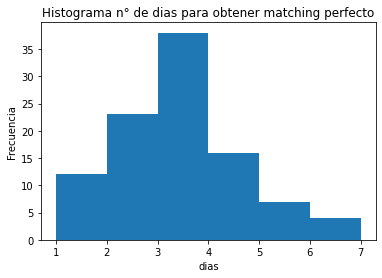

Máximo número de dias:  7
Mínimo número de dias:  1
promedio número de dias:  2.96


In [ ]:
Gale_Shapley_modify(4)

### - n=40

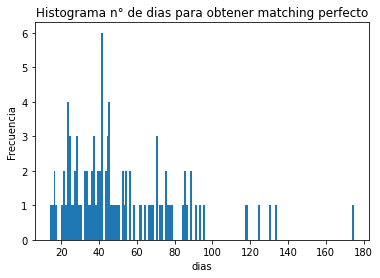

Máximo número de dias:  175
Mínimo número de dias:  14
promedio número de dias:  51.87


In [ ]:
Gale_Shapley_modify(40)